In [1]:
import sys
print(f'Conda environment used: {sys.executable}')

Conda environment used: /home/igarzonalva/.conda/envs/scvi_cpu_env/bin/python


In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import scvi 
print(f'Scanpy Version: {sc.__version__}')
print(f'Pandas Version: {pd.__version__}')
print(f'Numpy Version: {np.__version__}')
print(f'scvi Version: {scvi.__version__}')

/home/igarzonalva/.conda/envs/scvi_cpu_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Scanpy Version: 1.10.4
Pandas Version: 2.2.3
Numpy Version: 2.0.2
scvi Version: 1.2.2.post2


In [3]:
import os 
os.chdir('/home/igarzonalva/Proyecto_SC_TNBC/GSE161529')

In [4]:
fibro_adata = sc.read_h5ad('./LabelTransfer/adatas/Fibroblast/post_scarches_post_scanvi_V2_adata.h5ad')
myeloid_adata = sc.read_h5ad('./LabelTransfer/adatas/Myeloid/post_scarches_post_scanvi_V3_adata.h5ad')
general_adata = sc.read_h5ad('./02_Integration/adata/adata_scanvi_cuda_refinement.h5ad')

general_adata_hvg = general_adata[:, general_adata.var['highly_variable']].copy()
model = scvi.model.SCANVI.load('./02_Integration/models/scanvi_model_cuda_refinement', general_adata_hvg)

INFO     File ./02_Integration/models/scanvi_model_cuda_refinement/model.pt already downloaded                     


/home/igarzonalva/.conda/envs/scvi_cpu_env/lib/python3.12/site-packages/lightning/fabric/plugins/environments/slurm.py:204: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/igarzonalva/.conda/envs/scvi_cpu_env/lib/pytho ...


In [5]:
general_adata

AnnData object with n_obs × n_vars = 202731 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden', 'IGA_First_GenAnno', 'scanvi_prediction', 'IGA_PostScAnvi_GenAnno_colors'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'IGA_PostScAnvi_GenAnno_colors_colors', 'batch_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'predicted_labels_colors', 'scanvi_prediction_colors', 'subtype_colors', 'umap'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

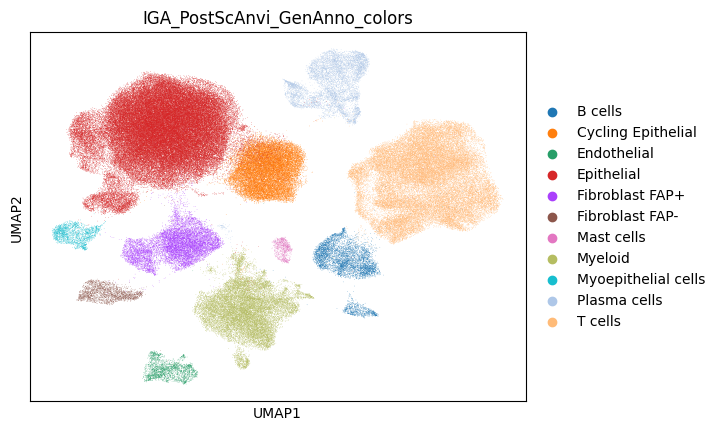

In [6]:
sc.pl.umap(general_adata, color = ['IGA_PostScAnvi_GenAnno_colors'])

## Load subsets

### FIBROBLASTS

In [7]:
fibro_adata

AnnData object with n_obs × n_vars = 13340 × 3000
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden', 'IGA_First_GenAnno', 'scanvi_prediction', 'IGA_PostScAnvi_GenAnno_colors', 'condition', 'CAF', '_scvi_batch', '_scvi_labels', 'CAF_scarches_predictions_V1', 'CAF_scarches_predictions_V2', 'CAF_scarches_predictions_V3', 'scanvi_post_scarches_pred_score', 'CAF_scarches_predictions_V4', 'CAF_scarches_predictions_V5'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'CAF_scarches_predictions_V1_colors', 'CAF_scarches_predictions_V2_colors', 'CAF_scarches_pre

In [12]:
fibro_adata.obs.CAF_scarches_predictions_V5.value_counts()

CAF_scarches_predictions_V5
matrix_CAF       3994
iCAF             2340
IDO_CAF          1467
Pericytes        1221
IGA_U2           1081
vCAF             1027
IGA_U1            778
apCAF_FAPhigh     731
tumor_CAF         581
IGA_U3            120
Name: count, dtype: int64

### MYELOID

In [8]:
myeloid_adata

AnnData object with n_obs × n_vars = 19409 × 3000
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden', 'IGA_First_GenAnno', 'scanvi_prediction', 'IGA_PostScAnvi_GenAnno_colors', 'harm_study', 'author_cell_type', 'Myeloid_scarches_predictionsV1', '_scvi_batch', '_scvi_labels', 'Myeloid_scarches_predictionsV2', 'Myeloid_scarches_predictionsV2_1', 'Myeloid_scarches_predictions_V3', 'Myeloid_scarches_labels_V3', 'Myeloid_scarches_scores_V3', 'Myeloid_scarches_predictionsV4'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'IGA_PostScAnvi_GenAnno_colors_color

In [11]:
myeloid_adata.obs.Myeloid_scarches_predictionsV4.value_counts()

Myeloid_scarches_predictionsV4
RTM           2785
Mono          2668
Mac_Rec       2214
Mac_LA        2185
DC_General    1873
Mac_IFN       1591
cDC2          1566
Mac_Hypo      1556
Mac_Angio     1549
Mac_AgPres    1422
Name: count, dtype: int64

### EPITHELIAL

In [ ]:
epi_adata = general_adata[general_adata.obs.IGA_PostScAnvi_GenAnno_colors.isin(["Epithelial","Myoepithelial cells","Cycling Epithelial"]),:]

epi_adata

## Select cells from subsets 

In [16]:
fibro_cells = fibro_adata.obs.index.intersection(general_adata.obs.index)
fibro_cells

Index(['AAACCTGTCGCATGGC-1-GSM4909281', 'AACTCAGAGGGTTCCC-1-GSM4909281',
       'AACTCAGTCATATCGG-1-GSM4909281', 'AACTCCCGTCATGCCG-1-GSM4909281',
       'AACTTTCAGAGGGCTT-1-GSM4909281', 'AAGACCTAGAGCCTAG-1-GSM4909281',
       'AAGCCGCTCTTGTATC-1-GSM4909281', 'AAGGAGCGTTATGCGT-1-GSM4909281',
       'AAGGCAGGTGACGGTA-1-GSM4909281', 'AAGTCTGTCTAACGGT-1-GSM4909281',
       ...
       'TTTCAGTGTAACGATA-1-GSM4909317', 'TTTCAGTTCAATGTCG-1-GSM4909317',
       'TTTCATGTCTTGCGCT-1-GSM4909317', 'TTTCGATGTGAGTAGC-1-GSM4909317',
       'TTTGACTAGGGTTAGC-1-GSM4909317', 'TTTGATCAGGTAACTA-1-GSM4909317',
       'TTTGATCGTCAAACGG-1-GSM4909317', 'TTTGGAGTCTCGGGAC-1-GSM4909317',
       'TTTGGAGTCTTCACAT-1-GSM4909317', 'TTTGTTGAGCGATGAC-1-GSM4909317'],
      dtype='object', length=13340)

In [17]:
myeloid_cells = myeloid_adata.obs.index.intersection(general_adata.obs.index)
myeloid_cells

Index(['AAACCTGGTAGCCTAT-1-GSM4909281', 'AAACGGGAGTTGTAGA-1-GSM4909281',
       'AAACGGGGTTCCCGAG-1-GSM4909281', 'AAAGATGCACTCGACG-1-GSM4909281',
       'AAAGATGCAGTCCTTC-1-GSM4909281', 'AAAGCAAAGGCCATAG-1-GSM4909281',
       'AACCATGCAGTAGAGC-1-GSM4909281', 'AACCATGGTACAGCAG-1-GSM4909281',
       'AACCGCGTCCGTTGTC-1-GSM4909281', 'AACGTTGCACCAGGCT-1-GSM4909281',
       ...
       'TTTCCTCAGTGAGCCA-1-GSM4909317', 'TTTCCTCCAATGAAAC-1-GSM4909317',
       'TTTCCTCTCGCCAGTG-1-GSM4909317', 'TTTCGATGTAGCTTGT-1-GSM4909317',
       'TTTGACTCATCAGCAT-1-GSM4909317', 'TTTGACTTCAGCAGAG-1-GSM4909317',
       'TTTGACTTCTTTCTAG-1-GSM4909317', 'TTTGGAGCATTCTCCG-1-GSM4909317',
       'TTTGGTTAGCATTTCG-1-GSM4909317', 'TTTGTTGCACCTTCCA-1-GSM4909317'],
      dtype='object', length=19409)

In [ ]:
epi_cells = epi_adata.obs.index.intersection(general_adata.obs.index)
epi_cells

## Copy the most updated annotation from the general object into a new annotation

In [18]:
general_adata.obs['post_lt_anno'] = general_adata.obs.IGA_PostScAnvi_GenAnno_colors.copy()
general_adata.obs['post_lt_anno'].value_counts()

post_lt_anno
Epithelial             90418
T cells                39903
Cycling Epithelial     20964
Myeloid                19409
Fibroblast FAP+        11062
Plasma cells            7402
B cells                 6053
Endothelial             2397
Fibroblast FAP-         2278
Myoepithelial cells     1992
Mast cells               853
Name: count, dtype: int64

## Transfer the annotations

In [20]:
general_adata.obs.post_lt_anno = general_adata.obs.post_lt_anno.astype(str)

# Fibro
general_adata.obs.loc[fibro_cells,'post_lt_anno'] = fibro_adata.obs.loc[fibro_cells, 'CAF_scarches_predictions_V5']
# Myeloid
general_adata.obs.loc[myeloid_cells,'post_lt_anno'] = myeloid_adata.obs.loc[myeloid_cells, 'Myeloid_scarches_predictionsV4']
# Epithelial
general_adata.obs.loc[epi_cells,'post_lt_anno'] = 'EC' +  epi_adata.obs.loc[epi_cells, 'leiden'].astype(str)


general_adata.obs['post_lt_anno'] = general_adata.obs['post_lt_anno'].astype('category')

general_adata.obs['post_lt_anno'].value_counts()

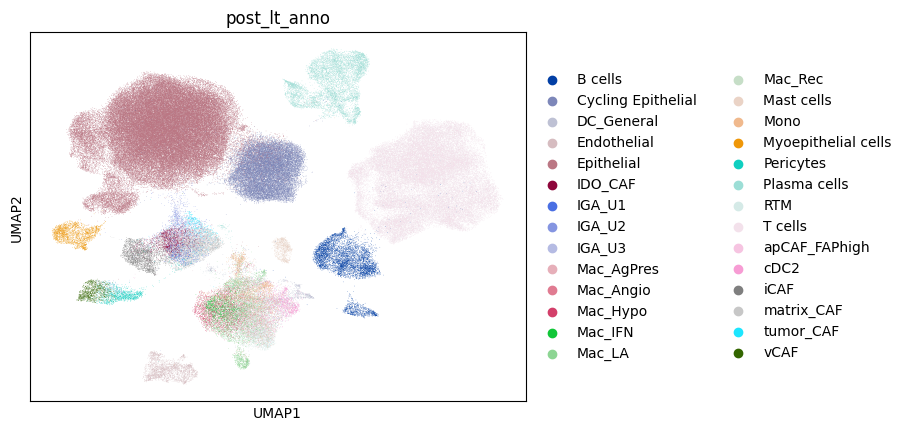

In [25]:
sc.pl.umap(general_adata, color = ['post_lt_anno'])

In [39]:
general_adata[general_adata.obs.IGA_PostScAnvi_GenAnno_colors.isin(["Epithelial","Myoepithelial cells","Cycling Epithelial"])].obs.leiden.isin(['20','7','5','9','11','4','6','8','15','16','17']).value_counts()

leiden
False    113211
True        163
Name: count, dtype: int64

In [55]:
# Filter 163 incorrected labelled cells (from the 113311 epithelial cells not significant)
condition1 = general_adata.obs.IGA_PostScAnvi_GenAnno_colors.isin(["Epithelial","Myoepithelial cells","Cycling Epithelial"])
condition2 = general_adata.obs.leiden.isin(['20','7','5','9','11','4','6','8','15','16','17'])

In [56]:
general_adata_fil = general_adata[~(condition1 & condition2)].copy()

In [57]:
general_adata_fil

AnnData object with n_obs × n_vars = 202568 × 22788
    obs: 'batch', 'subtype', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'complexity', 'n_genes', 'n_counts', 'predicted_labels', 'over_clustering', 'majority_voting', 'doublet_score', 'predicted_doublet', 'leiden', 'IGA_First_GenAnno', 'scanvi_prediction', 'IGA_PostScAnvi_GenAnno_colors', 'post_lt_anno'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'IGA_PostScAnvi_GenAnno_colors_colors', 'batch_colors', 'hvg', 'leiden', 'log1p', 'majority_voting_colors', 'neighbors', 'predicted_labels_colors', 'scanvi_prediction_colors', 'subtype_colors', 'umap', 'post_lt_anno_colors'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'd

# VISUALIZE RESULTS

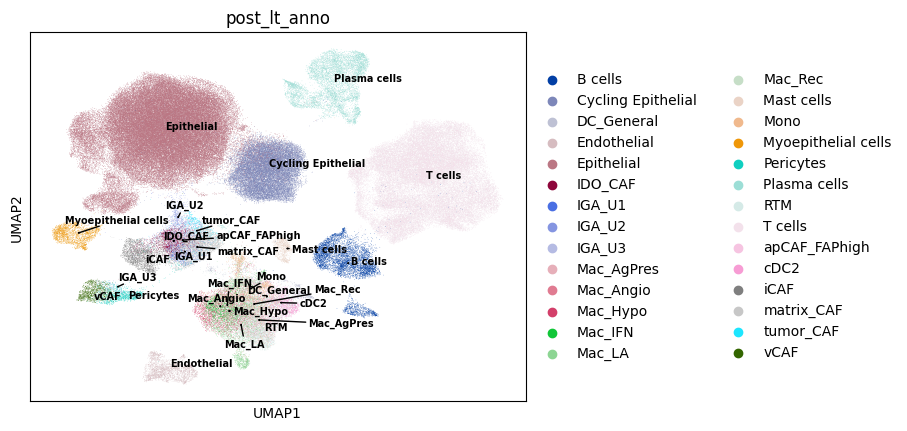

In [28]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
from adjustText import adjust_text

# 1. Plot the UMAP but don't show it yet
sc.pl.umap(general_adata_fil, color=["post_lt_anno"], show=False)

# 2. Extract UMAP coordinates and annotation labels
umap_coords = general_adata_fil.obsm["X_umap"]
annotations = general_adata_fil.obs["post_lt_anno"]
unique_annotations = annotations.unique()

# 3. Get the centroid for each unique annotation
texts = []
for cluster in unique_annotations:
    cluster_mask = annotations == cluster
    coords_cluster = umap_coords[cluster_mask]
    centroid = coords_cluster.mean(axis=0)

    # 4. Add text near the centroid
    t = plt.text(
        centroid[0], centroid[1], cluster, 
        fontsize=7, 
        weight='bold'
    )
    texts.append(t)

# 5. Use adjust_text to reduce label overlap, adding arrows
adjust_text(
    texts,
    arrowprops=dict(arrowstyle='->', color='black', lw=1.0)
)

plt.show()


In [58]:
general_adata_fil.write_h5ad('./LabelTransfer/adatas/general_adata_postLT.h5ad')

In [8]:
adata= sc.read_h5ad('./LabelTransfer/adatas/general_adata_postLT.h5ad')

In [10]:
adata.obs.post_lt_anno.value_counts()

post_lt_anno
Epithelial             90309
T cells                39903
Cycling Epithelial     20911
Plasma cells            7402
B cells                 6053
matrix_CAF              3994
RTM                     2785
Mono                    2668
Endothelial             2397
iCAF                    2340
Mac_Rec                 2214
Mac_LA                  2185
Myoepithelial cells     1991
DC_General              1873
Mac_IFN                 1591
cDC2                    1566
Mac_Hypo                1556
Mac_Angio               1549
IDO_CAF                 1467
Mac_AgPres              1422
Pericytes               1221
IGA_U2                  1081
vCAF                    1027
Mast cells               853
IGA_U1                   778
apCAF_FAPhigh            731
tumor_CAF                581
IGA_U3                   120
Name: count, dtype: int64